In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('winequality-red.csv', delimiter=';')

# forget quality column

In [2]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
from sklearn import preprocessing

quality = data.quality
dfNorm = data.drop('quality', 1, inplace=True)

dfNorm = preprocessing.normalize(data, axis=1)
dfNorm2 = pd.DataFrame(dfNorm, columns = data.columns)

# dfNorm = pd.get_dummies(data, columns=['quality'])

In [4]:
dfNorm2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.195153,0.018460,0.000000,0.050107,0.002004,0.290092,0.896647,0.026314,0.092566,0.014768,0.247896
1,0.107241,0.012099,0.000000,0.035747,0.001347,0.343722,0.921175,0.013705,0.043996,0.009349,0.134739
2,0.135457,0.013198,0.000695,0.039942,0.001598,0.260494,0.937777,0.017314,0.056614,0.011288,0.170189
3,0.174367,0.004359,0.008718,0.029580,0.001168,0.264664,0.934108,0.015537,0.049196,0.009030,0.152571
4,0.195153,0.018460,0.000000,0.050107,0.002004,0.290092,0.896647,0.026314,0.092566,0.014768,0.247896


In [5]:
from sklearn.cluster import KMeans

X = dfNorm2.values

kmeans = KMeans(n_clusters=3)

kmeans.fit(X)

KMeans(n_clusters=3)

In [6]:
kmeans.predict(X)

array([2, 0, 0, ..., 2, 2, 2])

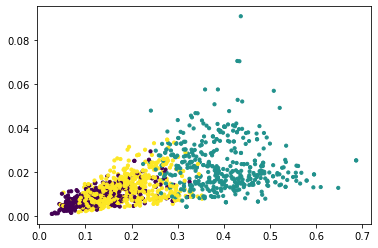

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], s=10, c=kmeans.predict(X))

In [7]:
from sklearn.cluster import MeanShift

ms = MeanShift()

ms.fit(X)

MeanShift()

In [8]:
ms.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

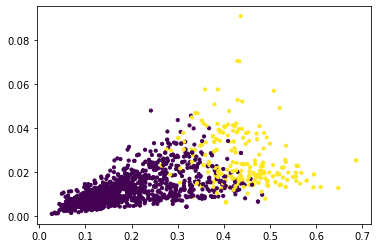

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], s=10, c=ms.predict(X))

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA()

x_pca = pca.fit_transform(X)
x_pca = pd.DataFrame(x_pca)
x_pca.head()



,0,1,2,3,4,5,6,7,8,9,10
0,-0.062071,-0.029945,-0.003448,-0.029561,0.016089,0.012920,0.000730,-0.001573,-0.001430,-0.000252,0.000659
1,-0.208146,0.029806,0.002845,0.007431,-0.002603,0.002664,0.004407,0.002738,-0.000378,0.000165,-0.000486
2,-0.172097,-0.058672,-0.004457,-0.007546,0.003984,0.002773,0.003553,0.001797,-0.000964,0.000165,-0.000370
3,-0.164567,-0.058459,0.039603,-0.009779,-0.004821,-0.004097,-0.000214,-0.003258,-0.000106,-0.000077,0.000198
4,-0.062071,-0.029945,-0.003448,-0.029561,0.016089,0.012920,0.000730,-0.001573,-0.001430,-0.000252,0.000659


Text(0, 0.5, 'cumulative explained variance')

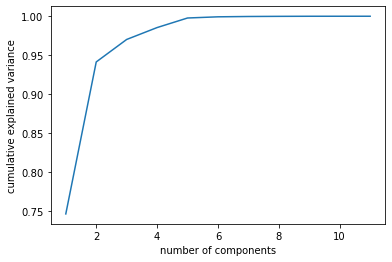

In [11]:
import matplotlib.pyplot as plt

np.cumsum(pca.explained_variance_ratio_)
plt.plot([1,2,3,4,5,6,7,8,9,10,11], np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')